<a href="https://colab.research.google.com/github/Vivekbistan/IITtest1/blob/main/practiceproject_on_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,178 (1.22 MB)

 Trainable params: 319,178 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
625/625 - 80s - 128ms/step - accuracy: 0.4342 - loss: 1.5604 - val_accuracy: 0.5203 - val_loss: 1.3195
Epoch 2/15
625/625 - 81s - 130ms/step - accuracy: 0.5936 - loss: 1.1463 - val_accuracy: 0.6170 - val_loss: 1.0790
Epoch 3/15
625/625 - 81s - 129ms/step - accuracy: 0.6607 - loss: 0.9680 - val_accuracy: 0.6582 - val_loss: 0.9512
Epoch 4/15
625/625 - 82s - 131ms/step - accuracy: 0.7027 - loss: 0.8494 - val_accuracy: 0.6959 - val_loss: 0.8816
Epoch 5/15
625/625 - 82s - 131ms/step - accuracy: 0.7330 - loss: 0.7634 - val_accuracy: 0.6984 - val_loss: 0.8778
Epoch 6/15
625/625 - 86s - 137ms/step - accuracy: 0.7599 - loss: 0.6888 - val_accuracy: 0.7126 - val_loss: 0.8237
Epoch 7/15
625/625 - 78s - 124ms/step - accuracy: 0.7807 - loss: 0.6239 - val_accuracy: 0.7273 - val_loss: 0.8054
Epoch 8/15
625/625 - 77s - 123ms/step - accuracy: 0.7980 - loss: 0.5773 - val_accuracy: 0.7253 - val_loss: 0.8062
Epoch 9/15
625/625 - 81s - 130ms/step - accuracy: 0.8178 - loss: 0.5199 - val_accuracy: 

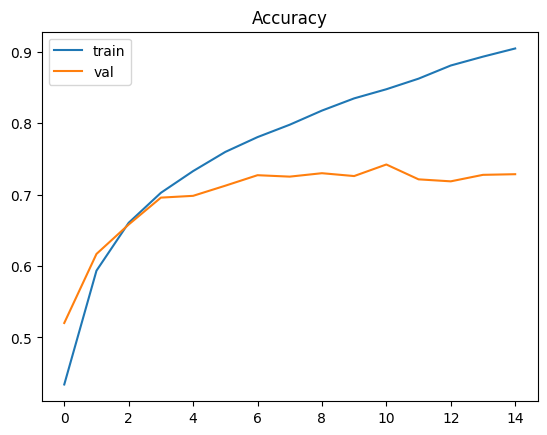

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test  = tf.keras.utils.to_categorical(y_test , num_classes)
model = models.Sequential([

    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.summary()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=15,
                    batch_size=64,
                    validation_split=0.2,
                    verbose=2)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"Test accuracy = {test_acc:.3f}")
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.title('Accuracy')
plt.show()